In [25]:
import yaml
import numpy as np
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
import bh_photo_z_validation as pval
path = '/Users/hoyleb/Documents/python/modules/photoz-wg/validation/'
almost_black = '#262626'
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams.update({'font.size': 32, 
                     'axes.linewidth': 5,
                    'text.color': almost_black,
                    'xtick.major.size': 4,
                    'ytick.major.size': 4,
                    'legend.fancybox': True,
                    'figure.dpi': 300,
                    'legend.fontsize': 16,
                    'legend.framealpha': 0.8,
                    'legend.shadow': True,
                    'xtick.labelsize': 22,
                    'ytick.labelsize': 22})

In [10]:
pth = '/Users/hoyleb/DATA/DES/PHOTOZ/RESAMPLE_VALIDATION/WL_SAMPLE_PREDICTION_MACHINE/'
t1 = pth + 'shuffled.Y1v103_rand_sel_WL_flag.class0_1.ELLIPS.fits.y1v03.wl_class.v2.p.fits'
t2 = pth + 'shuffled.Y1v103_rand_sel_WL_flag.class1_1.ELLIPS.fits.y1v03.wl_class.v2.p.fits'

trn = fits.open(t1)
tst = fits.open(t2)


/Users/hoyleb/DATA/DES/PHOTOZ/RESAMPLE_VALIDATION/WL_SAMPLE_PREDICTION_MACHINE/shuffled.Y1v103_rand_sel_WL_flag.class0_1.ELLIPS.fits.y1v03.wl_class.v2.p.fits /Users/hoyleb/DATA/DES/PHOTOZ/RESAMPLE_VALIDATION/WL_SAMPLE_PREDICTION_MACHINE/shuffled.Y1v103_rand_sel_WL_flag.class1_1.ELLIPS.fits.y1v03.wl_class.v2.p.fits


array([1, 0, 0, ..., 0, 0, 0])

In [26]:
px = np.arange(0,1,0.01)

prec_trn = []
prec_tst = []

recall_trn = []
recall_tst = []

for i in px:
    prec_trn.append(precision_score(trn[1].data['WL_CLASS'], 
                                    trn[1].data['PROB_PREDICTED_WL_CLASS_1'] > i))
    prec_tst.append(precision_score(tst[1].data['WL_CLASS'], 
                        tst[1].data['PROB_PREDICTED_WL_CLASS_1'] > i))
    recall_trn.append(recall_score(trn[1].data['WL_CLASS'], 
                        trn[1].data['PROB_PREDICTED_WL_CLASS_1'] > i))
    recall_tst.append(recall_score(tst[1].data['WL_CLASS'], 
                        tst[1].data['PROB_PREDICTED_WL_CLASS_1'] > i))


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
prec_trn = np.array(prec_trn)
prec_tst = np.array(prec_tst)

recall_trn = np.array(recall_trn)
recall_tst = np.array(recall_tst)

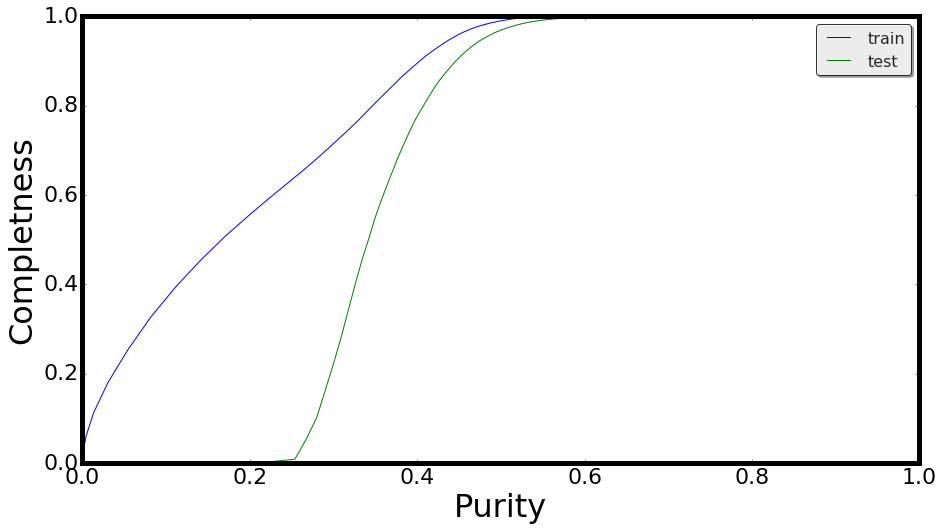

In [30]:
plt.plot( 1-prec_trn, recall_trn, label='train')
plt.plot( 1-prec_tst, recall_tst, label='test')
#recall = purity
#precision = complentnesss
plt.legend()
plt.xlabel('Purity')
plt.ylabel('Completness')

In [32]:
for i, p in enumerate(px):
    print 'train', p, recall_trn[i]*100, prec_trn[i]*100 

    print 'test', p, recall_tst[i]*100 , prec_tst[i]*100

#now  55% purity at 90% commpleteness
#previous 40% purity and 90% complet


train 0.0 100.0 28.4875368624
test 0.0 99.9971205529 28.5031754196
train 0.01 100.0 35.4982286393
test 0.01 99.9689659585 35.4166454142
train 0.02 100.0 37.5192754129
test 0.02 99.9340926542 37.3981247897
train 0.03 100.0 38.8698576792
test 0.03 99.8902610699 38.7104733282
train 0.04 100.0 39.9059423167
test 0.04 99.837151267 39.724089996
train 0.05 100.0 40.7671315949
test 0.05 99.7811620169 40.5612686159
train 0.06 99.9980764545 41.5120756038
test 0.06 99.7242129511 41.2670126569
train 0.07 99.9945499545 42.179975577
test 0.07 99.6579856668 41.8811428571
train 0.08 99.9874969544 42.7814051741
test 0.08 99.5917583824 42.4579115853
train 0.09 99.9772380452 43.3387995608
test 0.09 99.5290504223 42.9879059895
train 0.1 99.9679409087 43.8576578325
test 0.1 99.460583568 43.4733481473
train 0.11 99.9535143176 44.332381597
test 0.11 99.3841182493 43.9256261454
train 0.12 99.9365229992 44.7831352476
test 0.12 99.3041336063 44.3465426885
train 0.13 99.9147228171 45.2081858587
test 0.13 99.2276

In [35]:
ind_tr = (trn[1].data['WL_CLASS']==1) * (trn[1].data['PROB_PREDICTED_WL_CLASS_1'] < 0.3)
ind_tst = (tst[1].data['WL_CLASS']==1) * (tst[1].data['PROB_PREDICTED_WL_CLASS_1'] < 0.3)

print 'trainign objects we get wrong'
print tst[1].data['COADD_OBJECTS_ID'][ind_tst][0:50]
print 'test objects we get wrong'
print trn[1].data['COADD_OBJECTS_ID'][ind_tr][0:50]

trainign objects we get wrong
[3075019435 3007993928 3112020062 3079694256 3027028358 3123647734
 3074511884 3087201124 3105514629 3058100671 3046232682 3043494763
 3019708876 3095929726 3136915724 3043579248 3074565886 3060176607
 3083511120 3047951664 3101556628 3092709913 3055909065 3072129352
 3009004998 3103176626 3076118119 3070618322 3039382608 3029906579
 3066161852 3011434024 3081822686 3054322665 3015249336 3086622489
 3095386254 3105252809 3142714506 3122477116 3078599665 3123103513
 3060680775 3139372640 3077311720 3083878640 3097442027 3100406028
 3031623613 3063557295]
test objects we get wrong
[3079443211 3039902739 3109678244 3145220445 3039724306 3141889420
 3019402214 3098915220 3106994935 3073425766 3091073853 3009623209
 3053875143 3104984844 3050039876 3076754669 3041565085 3140492662
 3096572055 3105999894 3106205607 3094428921 3084725262 3159608463
 3089127692 3128563659 3020642991 3072079902 3067030657 3029917470
 3080282985 3150812874 3109112245 3038282210 3138